# Classification
**Course:** HUDK 4050, Week 6  
**Author:** Zecheng Chang  
**Asignment:** ICE4  
**Objectives:**  
At the end of this ICE, I'll be able to:
1. implement a binary logistic regression model to train a classifier  
2. implement a decision tree model to train a classifier  
3. implement a Naive Bayes model to train a classifier
4. report model performance on a validation dataset

## Logistic Regression

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
mooc = pd.read_csv('ICE4_Data.csv')
mooc.head(3)

,certified,forum.posts,grade,assignment
0,no,7,3,9
1,no,7,4,1
2,yes,191,8,19


In [4]:
# check how many different labels are there
# and how many for each
mooc['certified'].value_counts()

yes    725
no     275
Name: certified, dtype: int64

In [6]:
# check the descriptive statistic for the numerical variables
mooc.describe()

,forum.posts,grade,assignment
count,1000.000000,1000.00000,1000.000000
mean,113.107000,7.76500,13.693000
std,55.126477,2.38232,5.011973
min,1.000000,1.00000,1.000000
25%,72.750000,8.00000,12.000000
50%,118.500000,8.00000,15.000000
75%,160.000000,9.00000,17.000000
max,200.000000,10.00000,20.000000


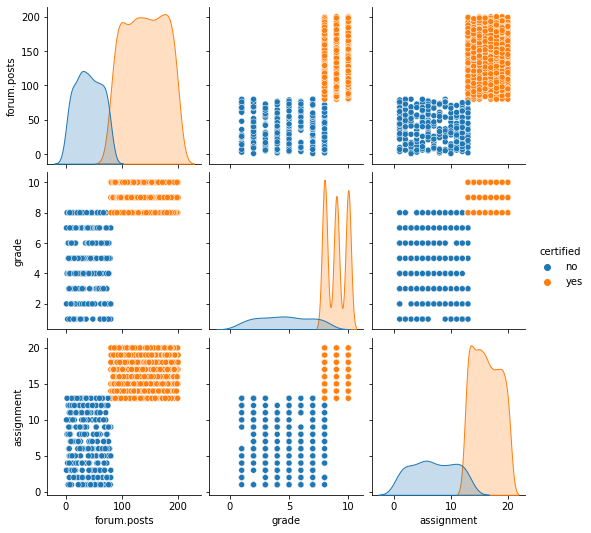

In [9]:
sns.pairplot(mooc, hue='certified');

From the plot above we can clearly see that the 2 classes of certified split the data almost perfectly.

In [47]:
# preparing data for logistic regression
y_dummy = pd.get_dummies(mooc['certified'], prefix = 'certified')
y_dummy.head()

,certified_no,certified_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [77]:
X = mooc.drop('certified',axis=1)
y = y_dummy.iloc[:,0]

In [60]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [61]:
print("Intercept is {}".format(lr.intercept_))

Intercept is [63.13291439]


In [50]:
print("Coef is {}".format(lr.coef_))

Coef is [[-0.62419697 -0.52270711 -0.85766257]]


In [82]:
lr2 = sm.Logit(y, X)
lr2_fit = lr2.fit()
print(lr2_fit.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           certified_no   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                     inf
Time:                        15:54:57   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
forum.posts    -0.0378      0.003    -10.852      0.000      -0.045      -0.031
grade           0.3202      0.0

/Users/czc/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/czc/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Assignment is not significant

In [57]:
preds1 = lr.predict(X)

In [62]:
roc_auc_score(y, preds1)

1.0

## Decision Tree

In [65]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [66]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: 1
|--- feature_0 >  79.50
|   |--- feature_1 <= 7.50
|   |   |--- class: 1
|   |--- feature_1 >  7.50
|   |   |--- class: 0



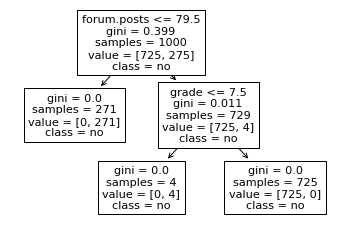

In [68]:
tree.plot_tree(dt,
              feature_names = ["forum.posts", "grade", "assignment"], 
                class_names = mooc.certified 
              );

## Naive Bayes

In [70]:
nb = GaussianNB()
nb.fit(X,y)

GaussianNB()

## Model evaluation

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [93]:
lr.fit(X_train, y_train)

lr2 = sm.Logit(y_train, X_train)
lr2_fit = lr2.fit()
print(lr2_fit.summary())

dt.fit(X_train, y_train)

nb.fit(X_train, y_train)

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           certified_no   No. Observations:                  750
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                     inf
Time:                        15:59:24   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
forum.posts    -0.0374      0.004     -9.180      0.000      -0.045      -0.029
grade           0.2935      0.0

/Users/czc/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/czc/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/czc/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/czc/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


GaussianNB()

In [94]:
pred1 = lr.predict(X_test)
pred2 = lr2_fit.predict(X_test)
pred3 = dt.predict(X_test)
pred4 = nb.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
print(confusion_matrix(pred1, y_test))

[[176   0]
 [  0  74]]


In [101]:
print(confusion_matrix(list(map(round, pred2)), y_test))

[[176  40]
 [  0  34]]


In [102]:
print(confusion_matrix(pred3, y_test))

[[176   1]
 [  0  73]]


In [103]:
print(confusion_matrix(pred4, y_test))

[[176   0]
 [  0  74]]


In [105]:
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(y_test, pred1)
ac_logit2 = accuracy_score(y_test, list(map(round, pred2)))
ac_tree = accuracy_score(y_test, pred3)
ac_NB = accuracy_score(y_test, pred4)

print("The accuracy for logistic regression in sklearn is", ac_logit1*100, "%")
print("The accuracy for logistic regression in statsmodels is", ac_logit2*100, "%")
print("The accuracy for decision tree", ac_tree*100, "%")
print("The accuracy for naive bayes", ac_NB*100, "%")

The accuracy for logistic regression in sklearn is 100.0 %
The accuracy for logistic regression in statsmodels is 84.0 %
The accuracy for decision tree 99.6 %
The accuracy for naive bayes 100.0 %
